In [501]:
import pandas as pd

In [502]:
df = pd.read_csv("Bird Strikes_Final.csv")

In [503]:
# Number of rows
print(f"Rows: {df.shape[0]}")
# Number of columns
print(f"Columns: {df.shape[1]}")

Rows: 25558
Columns: 25


In [504]:
# Print column names 
print(df.columns)

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')


In [505]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,23-11-2000 00:00,Caused damage,...,False,False,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,25-07-2001 00:00,Caused damage,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,14-09-2001 00:00,No damage,...,False,False,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,05-09-2002 00:00,No damage,...,True,False,Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,23-06-2003 00:00,No damage,...,False,False,Small,No Cloud,European starling,N,0,50,0,No


# Visualization 

<Axes: xlabel='FlightDate'>

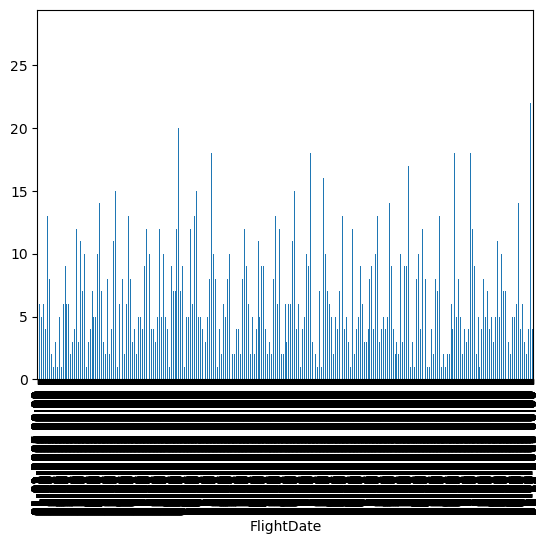

In [506]:
df.groupby(['FlightDate']).count()['Effect: Indicated Damage'].plot(kind='bar')

# Top 10 Airlines having encountered bird strike

<Axes: >

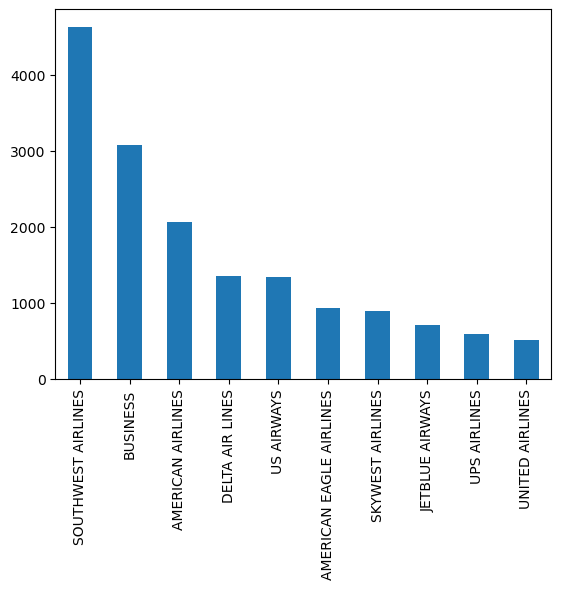

In [507]:
df["Aircraft: Airline/Operator"].value_counts()[:10].plot(kind='bar')

# Effect of Bird Strikes

<Axes: >

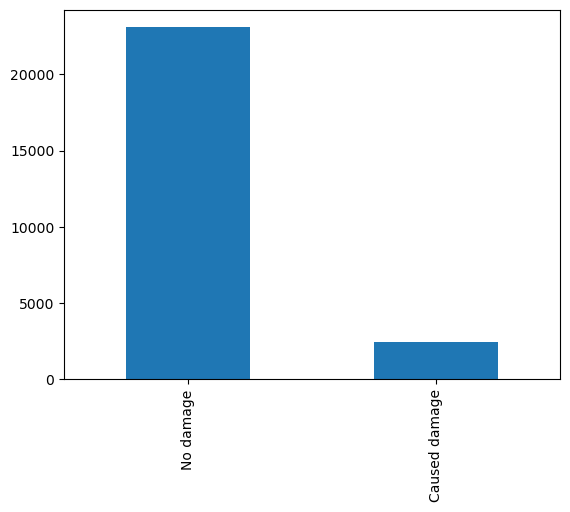

In [508]:
df['Effect: Indicated Damage'].value_counts().plot(kind='bar')

# Does Pilot warned about birds

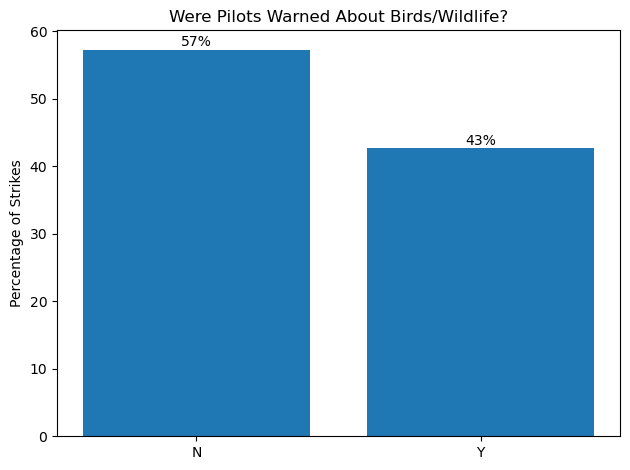

In [509]:
warned_counts = df['Pilot warned of birds or wildlife?'].value_counts()
total_strikes = warned_counts.sum()  

warned_pct = warned_counts.apply(lambda x: 100*x/total_strikes)

fig, ax = plt.subplots() 
ax.bar(warned_pct.index, warned_pct)

for p in ax.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()  
    ax.text(x, y+0.5, f'{y:.0f}%', ha='center') 

ax.set_ylabel('Percentage of Strikes')
ax.set_title('Were Pilots Warned About Birds/Wildlife?')

plt.tight_layout()
plt.show()


In [510]:
# Drop 
# Columns to remove  
drop_cols = ["Record ID", "Airport: Name", "Altitude bin","Aircraft: Type" ,
             "Aircraft: Make/Model", "FlightDate", "Effect: Impact to flight",
             "Wildlife: Number struck","Aircraft: Airline/Operator", "Origin State", "FlightDate" , "Conditions: Precipitation", 
             "Remains of wildlife sent to Smithsonian", "Cost: Total $", "Wildlife: Species",
             "Number of people injured"]


In [511]:
# Drop columns
df.drop(columns=drop_cols, inplace=True)

In [512]:
# Print dataframe shape  
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 25558
Columns: 10


In [513]:
df.head()

,Wildlife: Number Struck Actual,Effect: Indicated Damage,Aircraft: Number of engines?,When: Phase of flight,Remains of wildlife collected?,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Feet above ground,Is Aircraft Large?
0,859,Caused damage,2,Climb,False,Medium,No Cloud,N,"1,500",Yes
1,424,Caused damage,2,Landing Roll,False,Small,Some Cloud,Y,0,No
2,261,No damage,2,Approach,False,Small,No Cloud,N,50,No
3,806,No damage,2,Climb,True,Small,Some Cloud,Y,50,Yes
4,942,No damage,2,Approach,False,Small,No Cloud,N,50,No


In [514]:
# Rename columns
df = df.rename(columns={"Wildlife: Number Struck Actual": "BirdsStruck", "Effect: Indicated Damage": "Damage", "Aircraft: Number of engines?": "Engines", "When: Phase of flight" : "Flight phase", "Remains of wildlife collected?" : "Remains of wildlife collected", "Wildlife: Size" : "Wildlife size", "Conditions: Sky" : "Sky Conditiions", "Pilot warned of birds or wildlife?" : "Pilot warned of birds", "Is Aircraft Large?" : " Is Aircraft Large"})

In [515]:
df.head()

,BirdsStruck,Damage,Engines,Flight phase,Remains of wildlife collected,Wildlife size,Sky Conditiions,Pilot warned of birds,Feet above ground,Is Aircraft Large
0,859,Caused damage,2,Climb,False,Medium,No Cloud,N,"1,500",Yes
1,424,Caused damage,2,Landing Roll,False,Small,Some Cloud,Y,0,No
2,261,No damage,2,Approach,False,Small,No Cloud,N,50,No
3,806,No damage,2,Climb,True,Small,Some Cloud,Y,50,Yes
4,942,No damage,2,Approach,False,Small,No Cloud,N,50,No


In [516]:
order = ["Engines", "Flight phase", "Feet above ground", "Sky Conditiions","Pilot warned of birds","BirdsStruck","Wildlife size","Remains of wildlife collected", "Damage"]

In [517]:
df = df[order]

In [518]:
df.head()

,Engines,Flight phase,Feet above ground,Sky Conditiions,Pilot warned of birds,BirdsStruck,Wildlife size,Remains of wildlife collected,Damage
0,2,Climb,"1,500",No Cloud,N,859,Medium,False,Caused damage
1,2,Landing Roll,0,Some Cloud,Y,424,Small,False,Caused damage
2,2,Approach,50,No Cloud,N,261,Small,False,No damage
3,2,Climb,50,Some Cloud,Y,806,Small,True,No damage
4,2,Approach,50,No Cloud,N,942,Small,False,No damage


# Re-placing missing values with median


In [519]:
# Convert to numeric
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors ='coerce')
df['Engines'] = pd.to_numeric(df['Engines'], errors='coerce') 
df['BirdsStruck'] =  pd.to_numeric(df['BirdsStruck'], errors='coerce')

# Fill NA values 
median_Feet = df['Feet above ground'].median()
median_engines = df['Engines'].median()
median_struck = df['BirdsStruck'].median()

df['Feet above ground'].fillna(median_Feet, inplace = True)
df['Engines'].fillna(median_engines, inplace=True)
df['BirdsStruck'].fillna(median_struck, inplace=True)

# One Label Encoding on categorical variables

In [520]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Flight phase", "Sky Conditiions", "Pilot warned of birds", "Wildlife size", "Remains of wildlife collected"]  

# Label encoding
for col in categorical_cols:
  
  # Create LabelEncoder instance    
  le = LabelEncoder()  
  
  # Fit and transform column
  df[col] = le.fit_transform(df[col])   


# Seperate the Target variable 

In [521]:
df["Damage"] = df["Damage"].apply(lambda x: 1 if x == "Caused damage" else 0)


In [522]:
# Separate features (X) and target variable (y)
y = df['Damage']
X = df.drop(columns='Damage')

# Perfrom train Test Split

In [523]:
from sklearn.model_selection import train_test_split

# Assuming you have already loaded or prepared your dataset

# Split the data into training and the rest (temporarily)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)

# Now, split the rest into testing and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of each set
print(f"Training set size: {len(X_train_temp)}")
print(f"Testing set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

# Use X_train_temp, y_train_temp for your model training
# Use X_test, y_test for testing
# Use X_val, y_val for validation


Training set size: 17123
Testing set size: 4217
Validation set size: 4218


# Regression model 

In [561]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_train_temp, y_train_temp, X_test, y_test, X_val, y_val

# Check unique classes in y_train_temp
unique_classes_train = y_train_temp.unique()
print("Unique classes in y_train_temp:", unique_classes_train)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train_temp, y_train_temp)




Unique classes in y_train_temp: [0 1]


C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [562]:
# Make predictions on the testing set
y_val_pred = model.predict(X_val)


In [563]:
# View a few sample predictions 
print(y_val_pred[:5])

[0 0 0 0 0]


In [564]:
results_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_val_pred})

# Display the DataFrame
print(results_df)

       Actual  Predicted
19885       0          0
25073       0          0
2039        0          0
23825       0          0
25438       0          0
...       ...        ...
20283       0          0
2734        0          0
11423       0          1
18841       0          0
22024       0          0

[4218 rows x 2 columns]


In [566]:
# Calculate the number of incorrect predictions
incorrect_preds = (y_val != y_val_pred).sum()

# Display the count of incorrect predictions
print(f"Number of incorrect predictions: {incorrect_preds}")

Number of incorrect predictions: 430


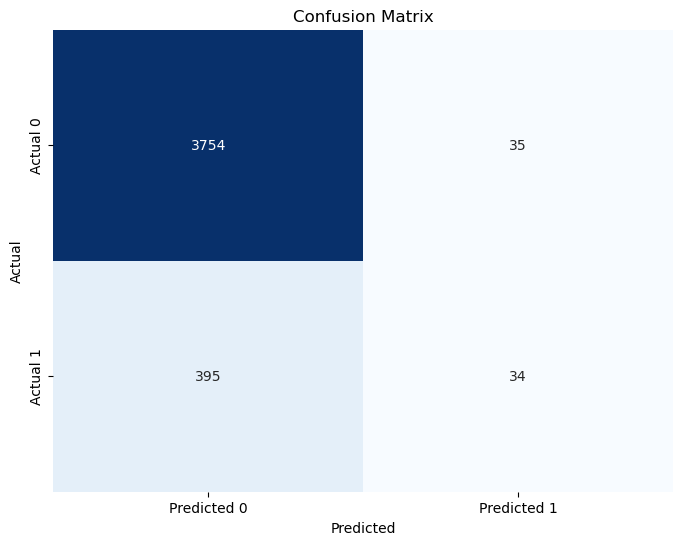

In [567]:
# Confusion matrix of predictions
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [568]:
# Model evaluation
from sklearn.metrics import accuracy_score
# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)

# Display the accuracy score
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8981


In [569]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_val, y_val_pred)

# Display the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      3789
           1       0.49      0.08      0.14       429

    accuracy                           0.90      4218
   macro avg       0.70      0.54      0.54      4218
weighted avg       0.86      0.90      0.86      4218



In [570]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision, recall, and f1-score
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Display the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.4928
Recall: 0.0793
F1-Score: 0.1365


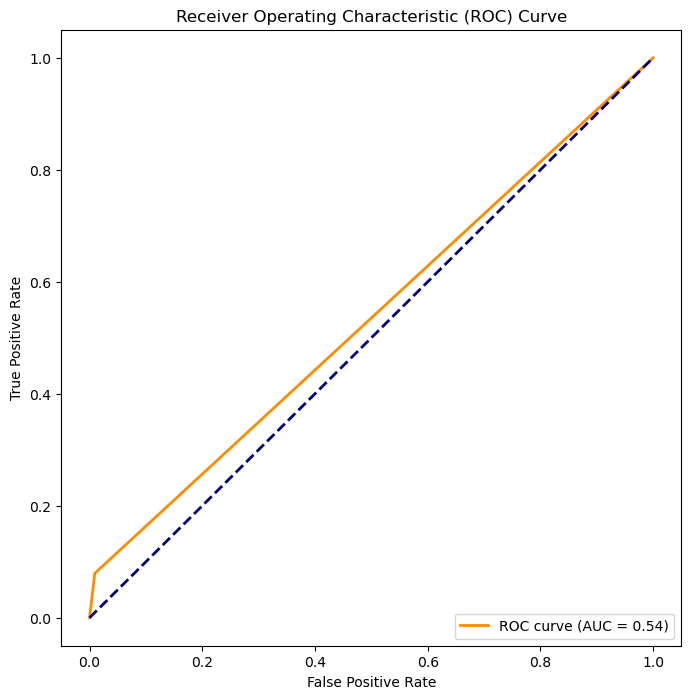

In [571]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_val_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

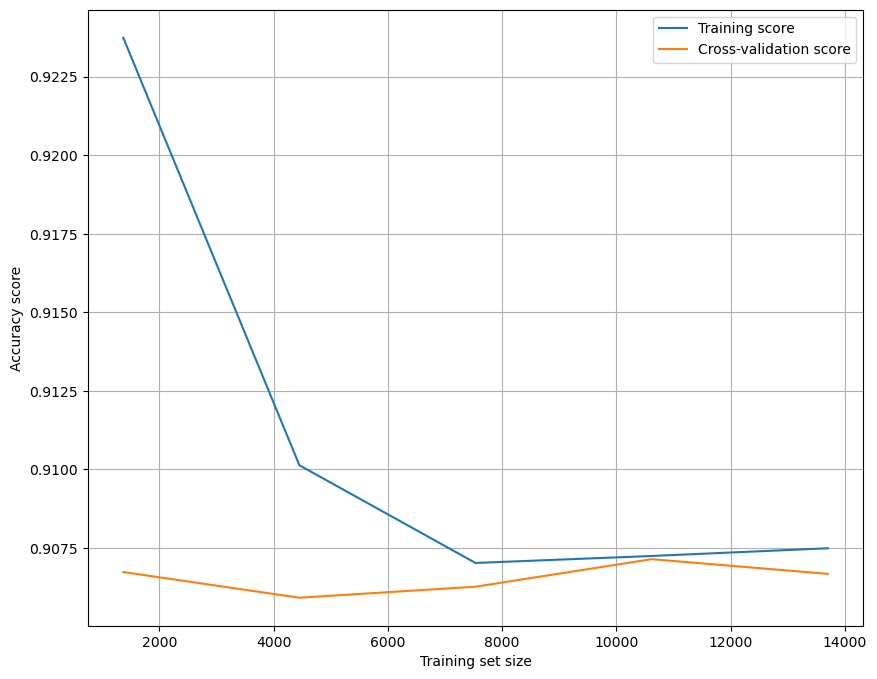

In [572]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    model, 
    X_train_temp, 
    y_train_temp,    
    cv=5,
    scoring='accuracy',
    
)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Cross-validation score')

plt.gca().set(xlabel='Training set size', ylabel='Accuracy score')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# The model is over fitting 

performing L2 Regularization

In [576]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



# Create a pipeline with StandardScaler, Logistic Regression, and L2 regularization
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2', solver='liblinear'))
])

# Define hyperparameters and their possible values
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_temp, y_train_temp)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Display the evaluation metrics
print("\nValidation Set Results:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-Score: {f1_val:.4f}")


Best Hyperparameters: {'classifier__C': 0.01}

Validation Set Results:
Accuracy: 0.9030
Precision: 0.6613
Recall: 0.0956
F1-Score: 0.1670


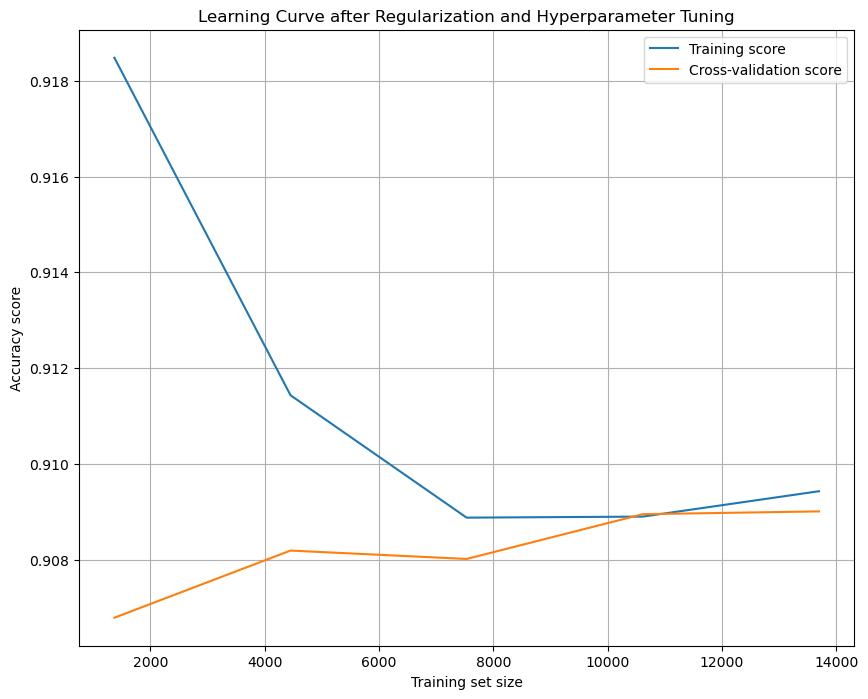

In [578]:
train_sizes, train_scores, valid_scores = learning_curve(
    best_model,  # Use the best_model obtained from hyperparameter tuning
    X_train_temp,
    y_train_temp,
    cv=5,
    scoring='accuracy'
)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Cross-validation score')

plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.title('Learning Curve after Regularization and Hyperparameter Tuning')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [582]:
# Obtain predictions on the validation set using the tuned model
y_val_pred_tuned = best_model.predict(X_val)

# Calculate the number of incorrect predictions
incorrect_predictions_tuned = (y_val != y_val_pred_tuned).sum()

# Calculate accuracy on the validation set using the tuned model
accuracy_val_tuned = accuracy_score(y_val, y_val_pred_tuned)

# Display the results
print(f"Number of incorrect predictions (after tuning): {incorrect_predictions_tuned}")
print(f"Accuracy on the validation set (after tuning): {accuracy_val_tuned:.4f}")

Number of incorrect predictions (after tuning): 409
Accuracy on the validation set (after tuning): 0.9030


The model has been improved after performing Regularization and Hyperparameter tuning

In [586]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)


In [587]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
report_rf = classification_report(y_val, y_val_pred_rf)

# Display results
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)



Random Forest:
Accuracy: 0.8943
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3789
           1       0.46      0.22      0.29       429

    accuracy                           0.89      4218
   macro avg       0.69      0.59      0.62      4218
weighted avg       0.87      0.89      0.88      4218



In [588]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
report_svm = classification_report(y_val, y_val_pred_svm)

# Display results
print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(report_svm)


Support Vector Machine (SVM):
Accuracy: 0.8983
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3789
           1       0.00      0.00      0.00       429

    accuracy                           0.90      4218
   macro avg       0.45      0.50      0.47      4218
weighted avg       0.81      0.90      0.85      4218



C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [589]:
from sklearn.metrics import accuracy_score

# Assuming you have X_val and y_val for the validation set

# Obtain predictions on the validation set using the SVM model
y_val_pred_svm = svm_model.predict(X_val)

# Calculate the number of incorrect predictions
incorrect_predictions_svm = (y_val != y_val_pred_svm).sum()

# Calculate accuracy on the validation set using the SVM model
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)

# Display the results
print(f"Number of incorrect predictions (SVM): {incorrect_predictions_svm}")
print(f"Accuracy on the validation set (SVM): {accuracy_val_svm:.4f}")


Number of incorrect predictions (SVM): 429
Accuracy on the validation set (SVM): 0.8983


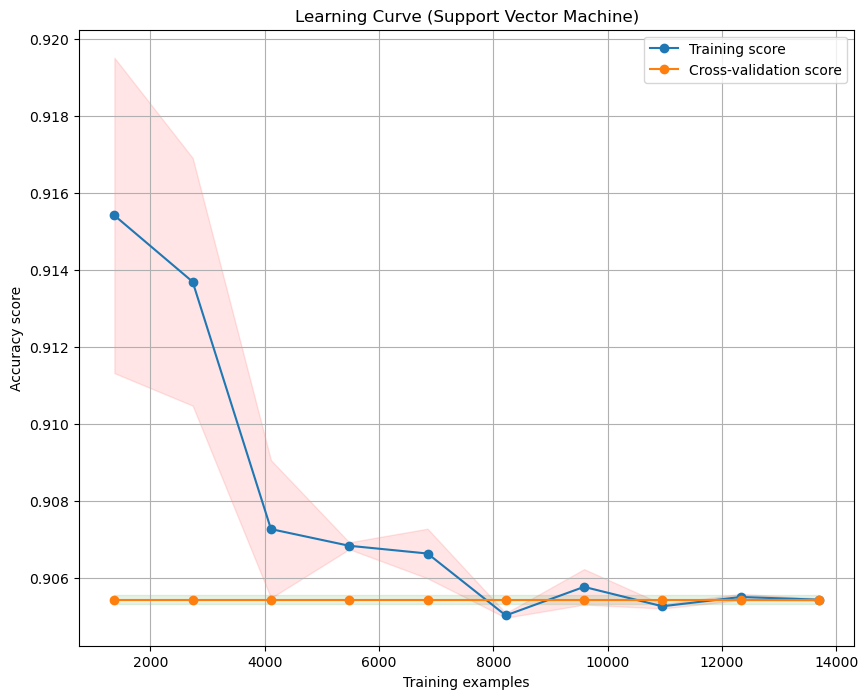

In [590]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy score")

    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")

    plt.plot(train_sizes, valid_scores_mean, 'o-', label='Cross-validation score')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot learning curve for SVM
title_svm = "Learning Curve (Support Vector Machine)"
plot_learning_curve(svm_model, title_svm, X_train, y_train, cv=5)


In [591]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg_model = LogisticRegression(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train models
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


# Make predictions
logreg_pred = logreg_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)


# Evaluate models
models = ['Logistic Regression', 'SVM', 'Random Forest']
for i, model in enumerate([logreg_pred, svm_pred, rf_pred]):
    print(f"\n{models[i]}:")
    print(f"Accuracy: {accuracy_score(y_test, model):.4f}")
    print(f"Precision: {precision_score(y_test, model):.4f}")
    print(f"Recall: {recall_score(y_test, model):.4f}")
    print(f"F1 Score: {f1_score(y_test, model):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, model):.4f}")


C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.9063
Precision: 0.6250
Recall: 0.1002
F1 Score: 0.1727
ROC AUC: 0.5468

SVM:
Accuracy: 0.9024
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000

Random Forest:
Accuracy: 0.9053
Precision: 0.5366
Recall: 0.2204
F1 Score: 0.3125
ROC AUC: 0.5999


C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [598]:
!pip install matplotlib-venn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33038 sha256=23a89d3e8ef51a017dadec4a8b3a12df53db34916e6325d58dd3998551f4bf79
  Stored in directory: c:\users\windows\appdata\local\pip\cache\wheels\f6\80\48\193eff32ed8e176623b15874055438ecec522ba68ed05abee6
Successfully built matplotlib-venn


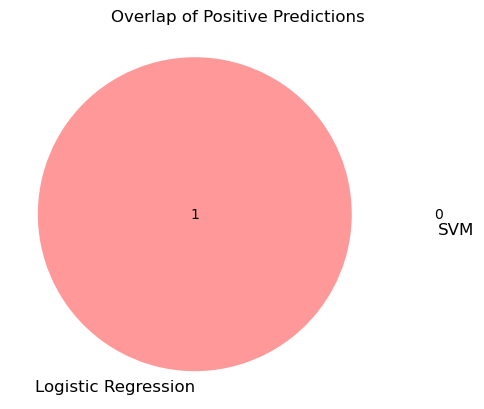

In [599]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

set1 = set(logreg_pred[logreg_pred == 1])
set2 = set(svm_pred[svm_pred == 1])

# Create a Venn diagram
venn2([set1, set2], set_labels=('Logistic Regression', 'SVM'))

plt.title('Overlap of Positive Predictions')
plt.show()

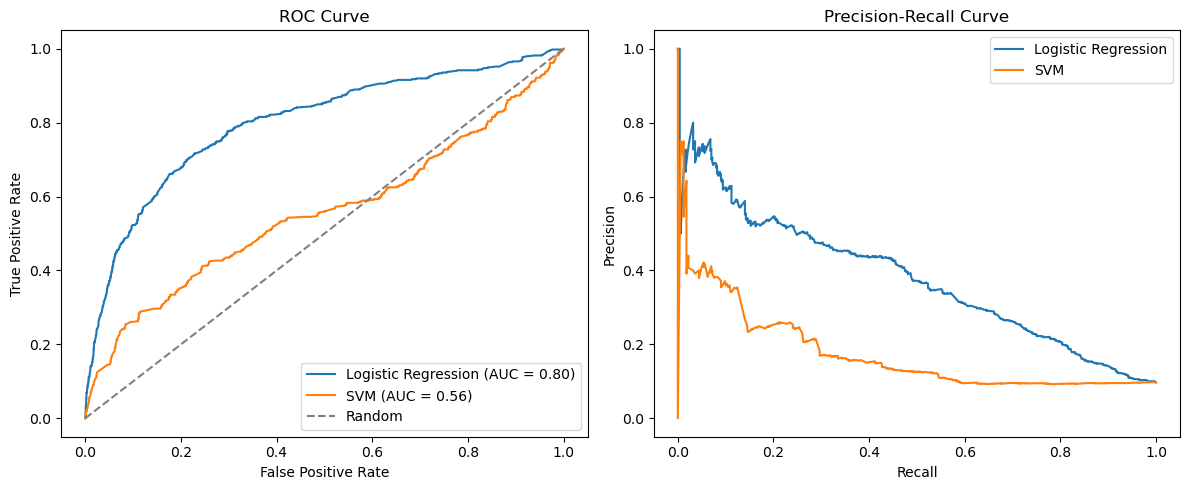

In [600]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Calculate ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate Precision-Recall curve for Logistic Regression
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])

# Calculate Precision-Recall curve for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_model.decision_function(X_test))

# Plot ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()
